<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Notebook 09: Linear algebra - Lab statement </font></p>
</p></br>
</p>
</CENTER>

----------------------------

# Table of contents <a name="table-of-contents"></a>

1. [Array processing](#Array-processing)
2. [Denoising via Principal Component Analysis (PCA)](#PCA-denoising)


------------------------

##  <span style="color:#00B8DE"> I - Array processing: sources localization</span><a name="Array-processing"></a>
[Table of contents](#table-of-contents)


>- 1- Simulate $T=400$ the contributions of two sources with pulsations $0°$ and $50°$, observed on ana array of $N=16$ sensors in the presence of a spatialy white noise, with $SNR=20dB$.
>- 2- Implement the periodogram spectrum estimator and observe it for 10 realizations. Plot the averaged periodogram. Influence of the number of sensors and of the SNR?
>- 3- Test the resolution of the periodogram (capacity to separate close sources) for $N=16,64$, by changing the pulsation of the second source. 
>- 4- Implement MUSIC algorithm
>- 5- Test the influence of the parameters (number of sensors, SNR, ...)

## Simple periodogram

In [ ]:
]add FFTW

In [ ]:
using Plots
using Statistics: mean
using FFTW
pyplot()

N    = 16
p    = 2
ϕ    = [0,50]*(π/180) 
T    = 400
SNR  = 20
σ    = 10^(-SNR/20)

#----------------
# Data generation
#----------------

s = hcat(sign.(sin.(2π*0.01*(1:T))),sqrt(2)*cos.(2*π*0.005*(1:T)))'
function noise(N,T)
    (randn(N,T)+im*randn(N,T))/sqrt(2)
end
data = exp.(im*(0:N-1)*ϕ') * noise(p,T) + σ * noise(N,T);

R = (1/T)*data*data'

d(ψ)=  exp.(im*(0:N-1)*ψ)
per(ψ) = abs(d(ψ)'*R*d(ψ))
#---------------------
# Periodogram
#---------------------
phase = range(-π,stop=π,length=200)
phased = range(-180,stop=180,length=200)
plot(phased,per.(phased*π/180))

In [ ]:
#------------------------------------------------
# Influence of second source location
# test for N=16,32,64
#------------------------------------------------
N    = 16
p    = 2
ϕ    = [0,15]*(π/180) 
T    = 400
SNR  = 20
σ    = 10^(-SNR/20)

#----------------
# Data generation
#----------------

s = hcat(sign.(sin.(2π*0.01*(1:T))),sqrt(2)*cos.(2*π*0.005*(1:T)))'
function noise(N,T)
    (randn(N,T)+im*randn(N,T))/sqrt(2)
end
data = exp.(im*(0:N-1)*ϕ') * noise(p,T) + σ * noise(N,T);

R = (1/T)*data*data'

d(ψ)=  exp.(im*(0:N-1)*ψ)
per(ψ) = abs(d(ψ)'*R*d(ψ))
#---------------------
# Periodogram
#---------------------
phase = range(-π,stop=π,length=200)
phased = range(-180,stop=180,length=200)
plot(phased,per.(phased*π/180),title="ϕ=15°, N = 16")

In [ ]:
N    = 32
p    = 2
ϕ    = [0,15]*(π/180) 
T    = 400
SNR  = 20
σ    = 10^(-SNR/20)

#----------------
# Data generation
#----------------

s = hcat(sign.(sin.(2π*0.01*(1:T))),sqrt(2)*cos.(2*π*0.005*(1:T)))'
function noise(N,T)
    (randn(N,T)+im*randn(N,T))/sqrt(2)
end
data = exp.(im*(0:N-1)*ϕ') * noise(p,T) + σ * noise(N,T);

R = (1/T)*data*data'

d(ψ)=  exp.(im*(0:N-1)*ψ)
per(ψ) = abs(d(ψ)'*R*d(ψ))
#---------------------
# Periodogram
#---------------------
phase = range(-π,stop=π,length=200)
phased = range(-180,stop=180,length=200)
plot(phased,per.(phased*π/180),title="ϕ=15°, N = 32")

In [ ]:
N    = 64
p    = 2
ϕ    = [0,50]*(π/180) 
T    = 400
SNR  = 20
σ    = 10^(-SNR/20)

#----------------
# Data generation
#----------------

s = hcat(sign.(sin.(2π*0.01*(1:T))),sqrt(2)*cos.(2*π*0.005*(1:T)))'
function noise(N,T)
    (randn(N,T)+im*randn(N,T))/sqrt(2)
end
data = exp.(im*(0:N-1)*ϕ') * noise(p,T) + σ * noise(N,T);

R = (1/T)*data*data'

d(ψ)=  exp.(im*(0:N-1)*ψ)
per(ψ) = abs(d(ψ)'*R*d(ψ))
#---------------------
# Periodogram
#---------------------
phase = range(-π,stop=π,length=200)
phased = range(-180,stop=180,length=200)
plot(phased,per.(phased*π/180),title="ϕ=15°, N = 64")

## Music algorithm

In [ ]:
#----------------
# MUSIC algorithm
#----------------
using LinearAlgebra: eigen, norm
#----------------
# Main parameters
#----------------
N    = 16
p    = 2
ϕ    = [0,51]*(π/180) 
T    = 400
SNR  = 0
σ    = 10^(-SNR/20)

#----------------
# Data generation
#----------------

s =  hcat(sign.(sin.(2π*0.01*(1:T))),sqrt(2)*cos.(2*π*0.005*(1:T)))'
function noise(N,T)
    (randn(N,T)+im*randn(N,T))/sqrt(2)
end
#data = exp.(im*(0:N-1)*ϕ') * noise(length(ϕ),T) + σ * noise(N,T);
data = exp.(im*(0:N-1)*ϕ') *s + σ * noise(N,T);

#----------------------
# Localization function
#----------------------
d(ψ)=  exp.(im*(0:N-1)*ψ)

# periodogram
R = (1/T)*data*data'
e = eigen(R) #the eigenvectors are sorted in an increasing way
U = e.vectors[:,1:N-p]
g(ψ) = 1/norm(d(ψ)'*U)^2

phased = range(-180,stop=180,length=2000)
plot(phased,g.(phased*π/180),title="Music algorithm ϕ=50°, N = 16")

##  <span style="color:#00B8DE"> II - Denoising via Principal Component Analysis (PCA) </span><a name="PCA-denoising"></a>
[Table of contents](#table-of-contents)


> - 1- Generate $nb\_images= 50$ images representing the same function $f(x,y)=1_{\{x^2+y^2\leq 1\}}(x,y)$ over the area $[-1.2,-1.2]\times[1.2,1.2]$, each in the presence of white Gaussian noise with variance 1. Generated images will be of size $100\times 100$. Plot a few images using for instance contourf and plot visualization functions.
> - 2- Explain how SVD could be used to get a better image out of these.
> - 3- Implement the denoising procedure. Plot the corresponding result.
> - 4- Check numericaly the efficiency of the procedure (bias, variance, ...)
> - 5- Compare the results with a mean over images ...
> - 6- Assume now that images amplitudes $f(x,y)$ are in addition affected by a uniform normal Gaussian amplitude. What do you observe in this case?

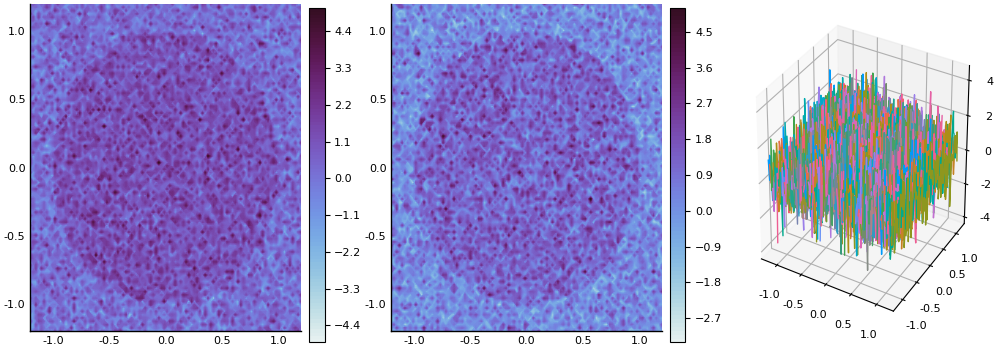

In [5]:
using Plots
pyplot(size=(1000,350))

# Data generation
#----------------
nb_images = 50
n = 100
f(x,y) = 1 .*(x.^2+y.^2 .<=1)

x = range(-1.2,stop=1.2,length=n)
y = range(-1.2,stop=1.2,length=n)

X = repeat(x',n,1)
Y = repeat(y,1,n)
Z = zeros(n,n,nb_images)
Z0 = f.(X,Y)
for k=1:nb_images
    Z[:,:,k] = Z0+randn(n,n)
end

fig1 = contourf(X,Y,Z[:,:,1], nlevels = 100, c=:dense,label="")
fig2 = contourf(X,Y,Z[:,:,2], nlevels = 100, c=:dense,label="")
fig3 = plot(X,Y,Z[:,:,3],label="")
plot(fig1,fig2,fig3,layout=(1,3))

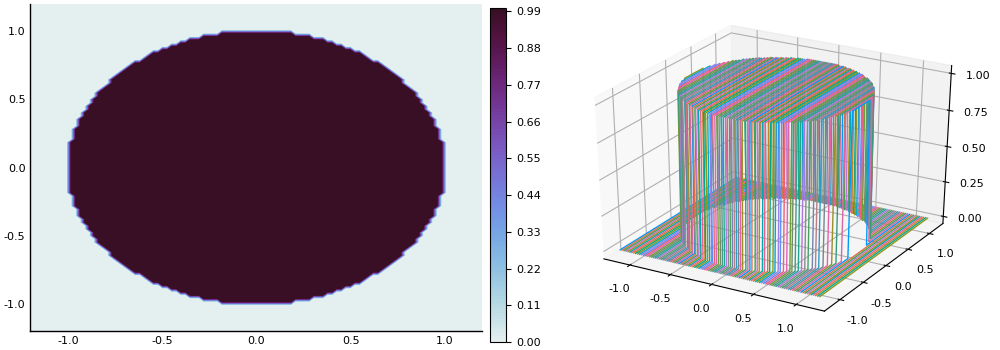

In [34]:
fig1 = contourf(X,Y,Z0[:,:], nlevels = 100, c=:dense,label="")
fig2 = plot(X,Y,Z0[:,:],label="")
plot(fig1,fig2,layout=(1,2))

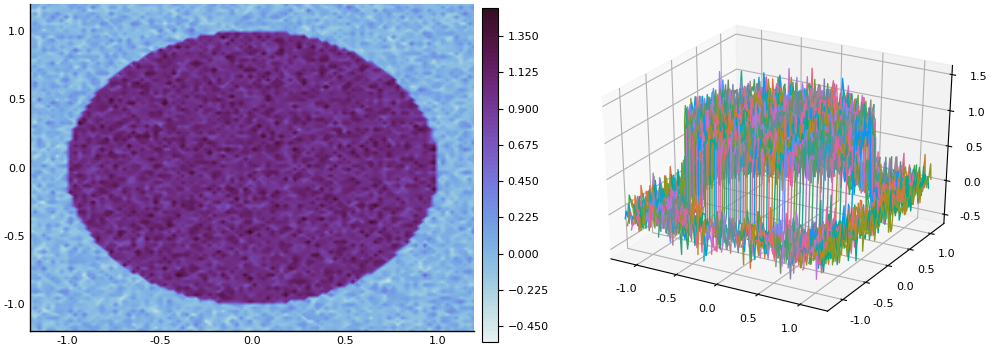

In [26]:
using LinearAlgebra: svd, Diagonal
# SVD
#----
rank = 1
A = reshape(Z, (n^2,nb_images))
svd_A = svd(A)
B_hat = zeros(n^2,nb_images)

for i=1:rank
    B_hat += svd_A.S[i] * svd_A.U[:,i]* transpose(svd_A.V[:,i])
end

B_hat = reshape(B_hat, (n,n,nb_images))
fig1 = contourf(X,Y,B_hat[:,:,1], nlevels = 100, c=:dense,label="")
fig2 = plot(X,Y,B_hat[:,:,3],label="")
plot(fig1,fig2,layout=(1,2))

In [43]:
bias = sum((Z0[:,:] - B_hat[:,:,1]).^2)/(n^2)
println("The obtained bias using only one column is: ", bias)

The obtained bias using only one column is: 0.01933929655740648


In [44]:
# Mean and MSE
#-------------
B_mean = zeros(n,n)
for i=1:nb_images
    B_mean += B_hat[:,:,i]/nb_images
end

bias = sum(Z0 - B_mean)/(n^2)
println("The obtained bias using all the columns is: ", bias)

The obtained bias using all the columns is: 1.2971124588804273e-5


## Multiplicative gaussian noise

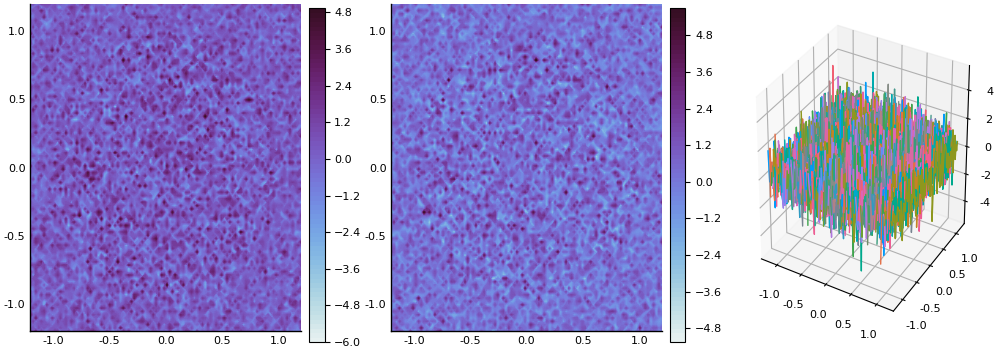

In [45]:
# 2nd case: random amplitudes
#-----------------------------
using Plots
pyplot(size=(1000,350))

# Data generation
#----------------
nb_images = 50
n = 100
f(x,y) = randn() .*(x.^2+y.^2 .<=1)

x = range(-1.2,stop=1.2,length=n)
y = range(-1.2,stop=1.2,length=n)

X = repeat(x',n,1)
Y = repeat(y,1,n)
Z = zeros(n,n,nb_images)
Z0 = f.(X,Y)
for k=1:nb_images
    Z[:,:,k] = Z0+randn(n,n)
end

fig1 = contourf(X,Y,Z[:,:,1], nlevels = 100, c=:dense,label="")
fig2 = contourf(X,Y,Z[:,:,2], nlevels = 100, c=:dense,label="")
fig3 = plot(X,Y,Z[:,:,3],label="")
plot(fig1,fig2,fig3,layout=(1,3))

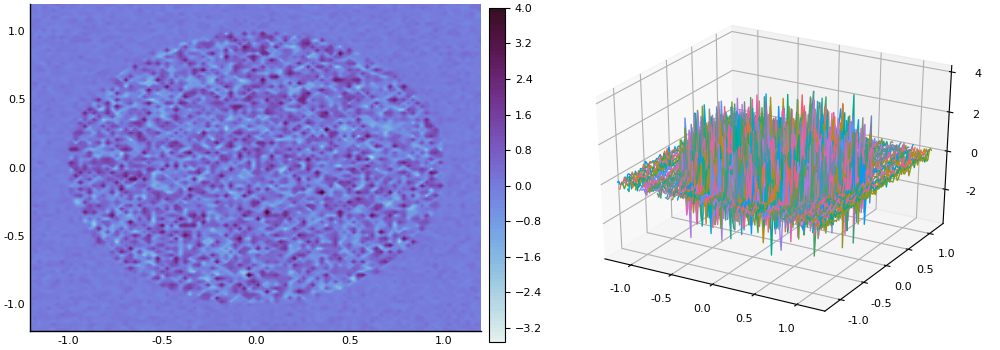

In [46]:
using LinearAlgebra: svd, Diagonal
# SVD
#----
rank = 1
A = reshape(Z, (n^2,nb_images))
svd_A = svd(A)
B_hat = zeros(n^2,nb_images)

for i=1:rank
    B_hat += svd_A.S[i] * svd_A.U[:,i]* transpose(svd_A.V[:,i])
end

B_hat = reshape(B_hat, (n,n,nb_images))
fig1 = contourf(X,Y,B_hat[:,:,1], nlevels = 100, c=:dense,label="")
fig2 = plot(X,Y,B_hat[:,:,3],label="")
plot(fig1,fig2,layout=(1,2))

In [47]:
bias = sum((Z0[:,:] - B_hat[:,:,1]).^2)/(n^2)
println("The obtained bias using only one column is: ", bias)

The obtained bias using only one column is: 0.020339288183809704


In [48]:
# Mean and MSE
#-------------
B_mean = zeros(n,n)
for i=1:nb_images
    B_mean += B_hat[:,:,i]/nb_images
end

bias = sum(Z0 - B_mean)/(n^2)
println("The obtained bias using all the columns is: ", bias)

The obtained bias using all the columns is: 0.0015750124312050907


We observe then that the total bias is bigger